In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## Read Data from File

In [5]:
data1 = pd.read_csv('CS_05.csv')

In [6]:
data1.head()

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [7]:
data1.shape

(322, 21)

## Understanding Business Question

Sports Analytics

Hitters data set:

Major League Baseball Data from the 1986 and 1987 seasons

## Data Inspection 

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

### Varibles:

AtBat: Number of times at bat in 1986

Hits:  Number of hits in 1986

HmRun: Number of home runs in 1986

Runs:  Number of runs in 1986

RBI:   Number of runs batted in in 1986

Walks: Number of walks in 1986

Years: Number of years in the major leagues

CAtBat: Number of times at bat during his career

CHits:  Number of hits during his career

CHmRun: Number of home runs during his career

CRuns:  Number of runs during his career

CRBI:   Number of runs batted in during his career

CWalks: Number of walks during his career

League: A factor with levels A and N indicating player's league at the end of 1986

Division: A factor with levels E and W indicating player's division at the end of 1986

PutOuts:  Number of put outs in 1986

Assists:  Number of assists in 1986

Errors:   Number of errors in 1986

Salary:   1987 annual salary on opening day in thousands of dollars

NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987


In [9]:
data1.isna().sum()

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [10]:
#Dealing w/ MVs
#Analysis of MVs should be done
#Remove records with MVs
data2 = data1.dropna(subset = ['Salary'], inplace = False)

In [11]:
#Remove players' name
data2 = data2.iloc[:, 1:]

In [12]:
data2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [13]:
data2.shape

(263, 20)

In [14]:
data2.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [15]:
data2.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

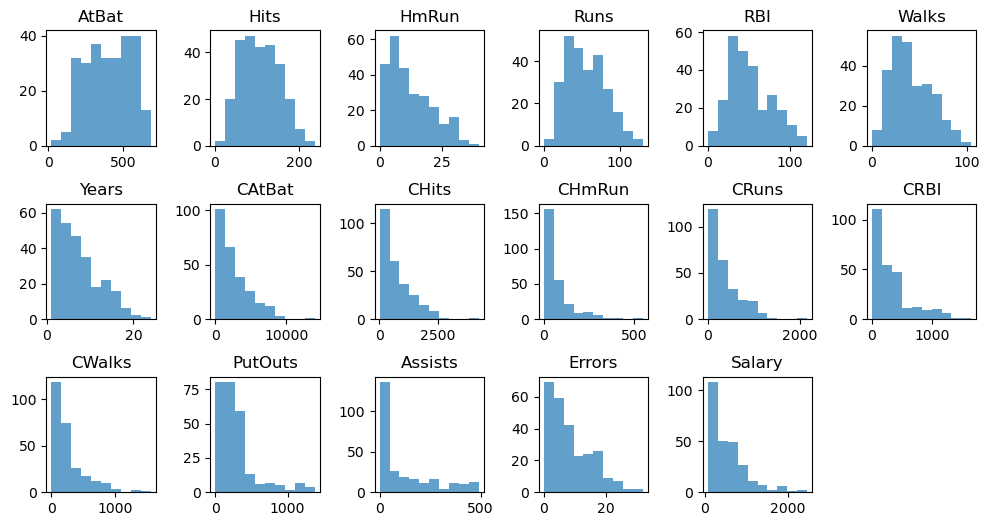

In [17]:
#Continuous variables distribution
var_ind = list(range(13)) + list(range(15, 19))
plot = plt.figure(figsize = (12, 6))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 18):
    a = plot.add_subplot(3, 6, i)
    a.hist(data2.iloc[: , var_ind[i - 1]], alpha = 0.7)
    a.title.set_text(data2.columns[var_ind[i - 1]])

Text(0.5, 1.0, 'Boxplot of Salary')

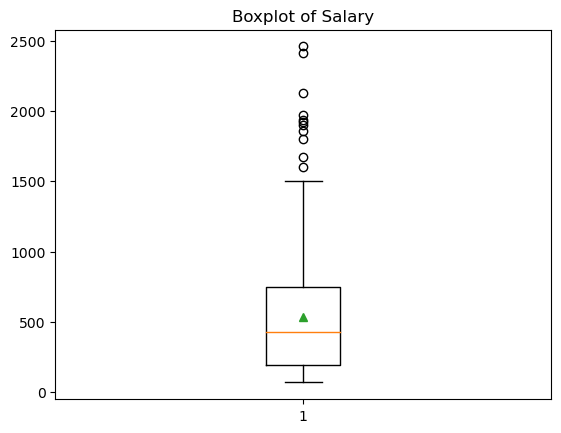

In [18]:
#Box plot of price
plt.boxplot(data2['Salary'], showmeans = True)
plt.title('Boxplot of Salary')

In [19]:
#Correlation Analysis
corr_table = round(data2.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.00,0.96,0.56,0.90,0.80,0.62,0.01,0.21,0.23,0.21,0.24,0.22,0.13,0.31,0.34,0.33,0.39
Hits,0.96,1.00,0.53,0.91,0.79,0.59,0.02,0.21,0.24,0.19,0.24,0.22,0.12,0.30,0.30,0.28,0.44
HmRun,0.56,0.53,1.00,0.63,0.85,0.44,0.11,0.22,0.22,0.49,0.26,0.35,0.23,0.25,-0.16,-0.01,0.34
Runs,0.90,0.91,0.63,1.00,0.78,0.70,-0.01,0.17,0.19,0.23,0.24,0.20,0.16,0.27,0.18,0.19,0.42
RBI,0.80,0.79,0.85,0.78,1.00,0.57,0.13,0.28,0.29,0.44,0.31,0.39,0.23,0.31,0.06,0.15,0.45
Walks,0.62,0.59,0.44,0.70,0.57,1.00,0.13,0.27,0.27,0.35,0.33,0.31,0.43,0.28,0.10,0.08,0.44
Years,0.01,0.02,0.11,-0.01,0.13,0.13,1.00,0.92,0.90,0.72,0.88,0.86,0.84,-0.02,-0.09,-0.16,0.40
CAtBat,0.21,0.21,0.22,0.17,0.28,0.27,0.92,1.00,1.00,0.80,0.98,0.95,0.91,0.05,-0.01,-0.07,0.53
CHits,0.23,0.24,0.22,0.19,0.29,0.27,0.90,1.00,1.00,0.79,0.98,0.95,0.89,0.07,-0.01,-0.07,0.55
CHmRun,0.21,0.19,0.49,0.23,0.44,0.35,0.72,0.80,0.79,1.00,0.83,0.93,0.81,0.09,-0.19,-0.17,0.52


<Axes: >

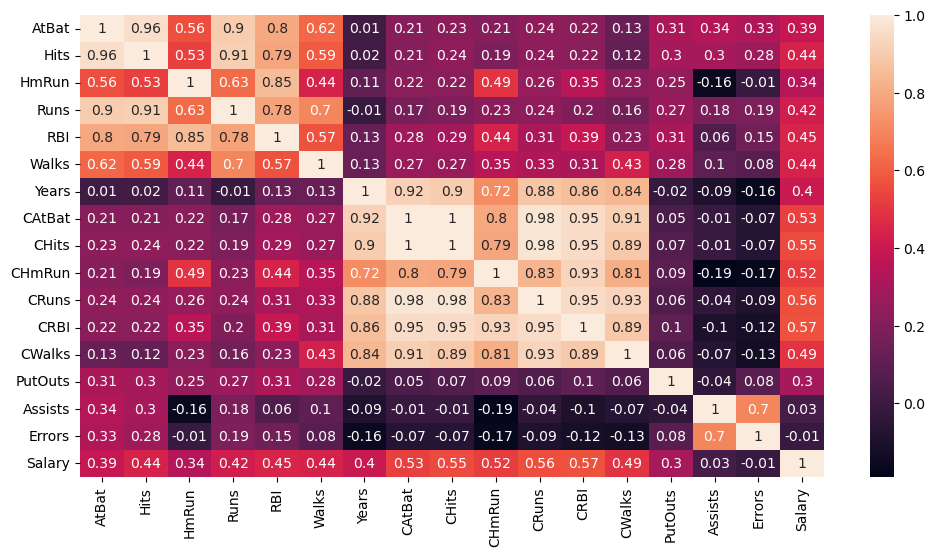

In [20]:
plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

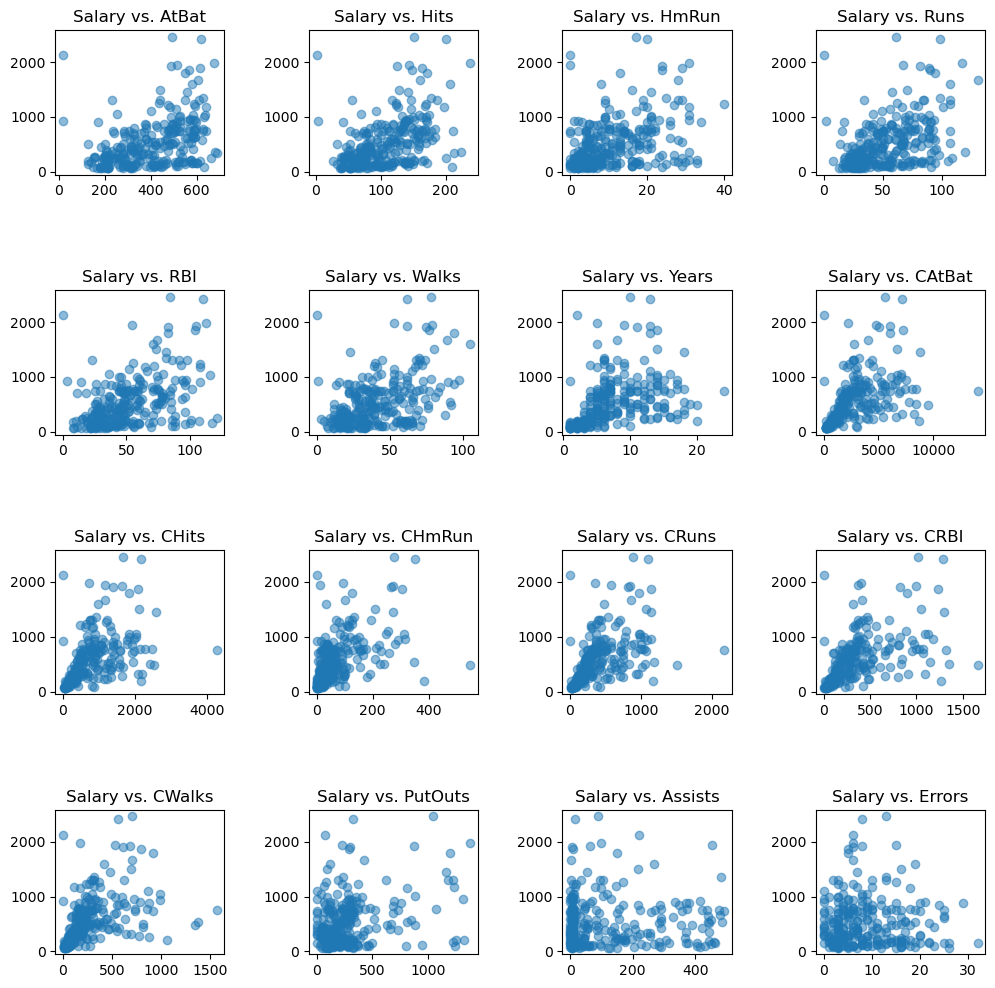

In [21]:
#Scatter Plot
var_ind = list(range(13)) + list(range(15, 18))
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.8, wspace = 0.5)
for i in range(1, 17):
    a = plot.add_subplot(4, 4, i)
    a.scatter(x = data2.iloc[: , var_ind[i - 1]], y = data2.iloc[: , 18], alpha = 0.5)
    a.title.set_text('Salary vs. ' + data2.columns[var_ind[i - 1]])

In [22]:
#Categorical variables
data2['League'].value_counts()

A    139
N    124
Name: League, dtype: int64

In [23]:
data2['Division'].value_counts()

W    134
E    129
Name: Division, dtype: int64

In [24]:
data2['NewLeague'].value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

## Data Preparation

### Divide Dataset into Train and Test

In [25]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data2, test_size = 0.2, random_state = 1234)

In [26]:
train.shape

(210, 20)

In [27]:
train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,409.009524,109.923810,11.880952,55.871429,52.290476,41.838095,7.409524,2658.804762,721.333333,70.361905,360.742857,331.709524,259.609524,292.023810,111.880952,8.228571,562.288433
std,148.097730,46.149683,8.872306,25.833802,26.641091,21.846408,4.624038,2126.724958,596.666853,83.085605,307.176493,315.682880,251.547022,275.904453,143.031332,6.307521,466.852811
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,9.000000,0.000000,6.000000,7.000000,4.000000,0.000000,0.000000,0.000000,68.000000
25%,283.000000,73.000000,5.000000,34.000000,30.000000,24.000000,4.000000,928.250000,230.250000,15.000000,116.250000,99.250000,76.500000,110.250000,7.000000,3.000000,210.000000
50%,417.000000,105.500000,9.000000,53.500000,47.000000,37.500000,6.000000,2035.500000,546.500000,40.000000,278.500000,251.500000,179.500000,226.000000,41.500000,6.000000,450.000000
75%,528.750000,144.750000,18.000000,76.000000,73.000000,57.000000,11.000000,3900.250000,1058.000000,92.750000,493.500000,419.750000,318.500000,318.500000,172.250000,12.750000,761.250000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,20.000000,9528.000000,2583.000000,548.000000,1509.000000,1659.000000,1380.000000,1377.000000,492.000000,29.000000,2460.000000


In [28]:
test.shape

(53, 20)

In [29]:
test.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,382.377358,99.528302,10.584906,50.283019,48.301887,38.245283,6.924528,2652.547170,725.566038,64.792453,363.113208,325.301887,262.867925,285.509434,146.018868,10.037736,431.470491
std,143.530113,40.146177,8.284448,24.056326,22.577716,21.160473,5.445001,2857.368387,828.292045,79.190947,416.452493,355.362414,311.416370,298.059211,151.253797,7.572629,368.025230
min,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,278.000000,70.000000,3.000000,32.000000,32.000000,22.000000,3.000000,682.000000,170.000000,16.000000,93.000000,80.000000,50.000000,117.000000,9.000000,4.000000,155.000000
50%,360.000000,103.000000,9.000000,48.000000,47.000000,34.000000,5.000000,1399.000000,357.000000,36.000000,168.000000,154.000000,128.000000,203.000000,80.000000,8.000000,297.500000
75%,511.000000,138.000000,17.000000,68.000000,60.000000,56.000000,10.000000,3828.000000,970.000000,90.000000,575.000000,458.000000,359.000000,325.000000,269.000000,16.000000,670.000000
max,584.000000,163.000000,33.000000,107.000000,104.000000,83.000000,24.000000,14053.000000,4256.000000,384.000000,2165.000000,1314.000000,1566.000000,1320.000000,465.000000,32.000000,1861.460000


## Building Prediction Model

### Model 1: Linear Regression

In [30]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(train[['League', 'Division', 'NewLeague']])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
98,0,1,0,1,0,1
206,0,1,0,1,0,1
54,1,0,1,0,1,0
177,1,0,1,0,1,0
27,0,1,0,1,0,1


In [31]:
#Define the feature set X 
X_ = train.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_train = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train = sm.add_constant(X_train) #adding a constant

#Define response variable
y_train = train['Salary']

In [32]:
X_train.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [33]:
y_train.head()

98      300.0
206     150.0
54      675.0
177    1300.0
27      750.0
Name: Salary, dtype: float64

In [34]:
#Regression Model
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.97e-24
Time:                        17:45:14   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Probability'>

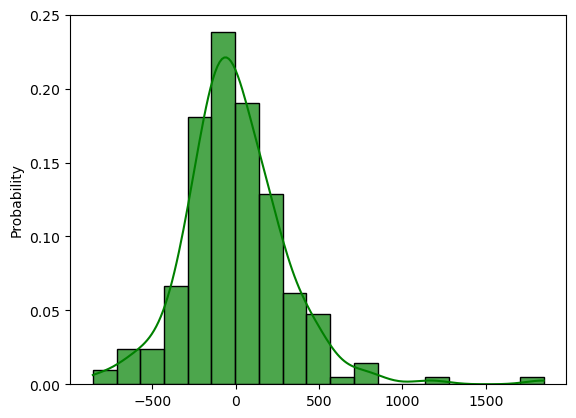

In [35]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm.resid), max(lm.resid), 20))

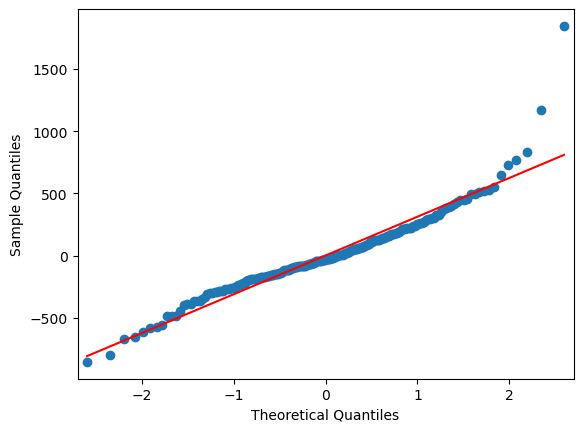

In [36]:
#QQ-plot
qqplot_lm = sm.qqplot(lm.resid, line = 's')
plt.show()

In [37]:
#Test for Skewness and Kurtosis
#Good for sample size > 25

#Jarque-Bera Test (Skewness = 0 ?)
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

#Omnibus K-squared normality test
#The Omnibus test combines the random variables for Skewness and Kurtosis into a single test statistic
#H0: the data is normally distributed
#p-value < 0.05 reject normality assumption

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.97e-24
Time:                        17:45:57   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

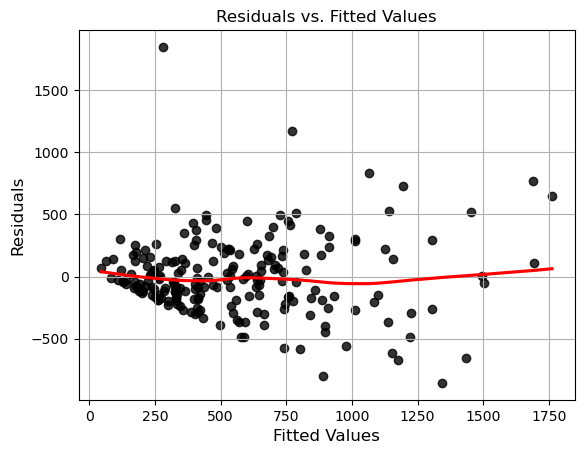

In [38]:
#Residuals vs. Fitted Values
sns.regplot(x = lm.fittedvalues, y = lm.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

In [39]:
#Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d > 1)

0

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 98 to 263
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        210 non-null    float64
 1   AtBat        210 non-null    int64  
 2   Hits         210 non-null    int64  
 3   HmRun        210 non-null    int64  
 4   Runs         210 non-null    int64  
 5   RBI          210 non-null    int64  
 6   Walks        210 non-null    int64  
 7   Years        210 non-null    int64  
 8   CAtBat       210 non-null    int64  
 9   CHits        210 non-null    int64  
 10  CHmRun       210 non-null    int64  
 11  CRuns        210 non-null    int64  
 12  CRBI         210 non-null    int64  
 13  CWalks       210 non-null    int64  
 14  PutOuts      210 non-null    int64  
 15  Assists      210 non-null    int64  
 16  Errors       210 non-null    int64  
 17  League_N     210 non-null    uint8  
 18  Division_W   210 non-null    uint8  
 19  NewLeag

In [41]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train.iloc[:, 1:])
#If VIF > 10 then multicollinearity is high

,variables,VIF
0,AtBat,184.789083
1,Hits,228.168969
2,HmRun,24.624973
3,Runs,94.783224
4,RBI,67.555583
5,Walks,22.239021
6,Years,19.479370
7,CAtBat,661.537532
8,CHits,1367.185526
9,CHmRun,94.537823


Conclusion:

Severe violation of regression assumptions

If select variables based on t-test results, limited number of variables will be selected.

Bad model!

t-test results are not reliable for predictors selection.

In [42]:
#Check t-test results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     12.28
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.97e-24
Time:                        17:46:52   Log-Likelihood:                -1504.0
No. Observations:                 210   AIC:                             3048.
Df Residuals:                     190   BIC:                             3115.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.2280    107.371      1.716      0.088     -27.565     396.021
AtBat          -1.7540      0.751     -2.336      0.021      -3.235      -0.273
Hits            6.5979      2.885      2.287      0.023       0.907      12.289
HmRun           7.3090      7.597      0.962      0.337      -7.675      22.293
Runs           -2.7338      3.582     -0.763      0.446      -9.799       4.332
RBI            -1.3503      3.172     -0.426      0.671      -7.608       4.908
Walks           5.4445      2.263      2.406      0.017       0.981       9.908
Years          -6.5675     14.116     -0.465      0.642     -34.412      21.277
CAtBat         -0.2467      0.172     -1.433      0.154      -0.586       0.093
CHits           0.5802      0.895      0.648      0.518      -1.185       2.346
CHmRun          0.0299      2.025      0.015      0.988      -3.965       4.025
CRuns           1.4403      0.886      1.625      0.106      -0.308       3.189
CRBI            0.3874      0.911      0.425      0.671      -1.409       2.184
CWalks         -0.6119      0.410     -1.491      0.137      -1.421       0.197
PutOuts         0.2961      0.094      3.141      0.002       0.110       0.482
Assists         0.2956      0.249      1.187      0.237      -0.195       0.787
Errors          0.7347      5.199      0.141      0.888      -9.520      10.990
League_N        5.0153     97.960      0.051      0.959    -188.214     198.245
Division_W   -134.5539     47.964     -2.805      0.006    -229.164     -39.944
NewLeague_N    36.0810     98.757      0.365      0.715    -158.719     230.881
==============================================================================
Omnibus:                       71.108   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              366.871
Skew:                           1.201   Prob(JB):                     2.16e-80
Kurtosis:                       9.013   Cond. No.                     2.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Regression Model based on t-test results
lm = sm.OLS(y_train, X_train[['const', 'AtBat', 'Hits','Walks','PutOuts', 'Division_W']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     20.05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           3.00e-16
Time:                        17:47:01   Log-Likelihood:                -1546.2
No. Observations:                 210   AIC:                             3104.
Df Residuals:                     204   BIC:                             3124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        174.4321     87.896      1.985      0.049       1.131     347.733
AtBat         -1.6859      0.702     -2.400      0.017      -3.071      -0.301
Hits           7.3574      2.169      3.391      0.001       3.080      11.635
Walks          6.4162      1.569      4.089      0.000       3.322       9.510
PutOuts        0.2851      0.104      2.751      0.006       0.081       0.489
Division_W  -158.5226     54.000     -2.936      0.004    -264.993     -52.052
==============================================================================
Omnibus:                       61.603   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.411
Skew:                           1.249   Prob(JB):                     3.64e-38
Kurtosis:                       6.670   Cond. No.                     1.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model 1: Prediction on Test dataset

In [44]:
test.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
295,19,4,1,2,3,1,1,19,4,1,2,3,1,N,W,692,70,8,920.0,A
132,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,A,W,0,0,0,325.0,A
137,343,103,6,48,36,40,15,4338,1193,70,581,421,325,A,E,211,56,13,430.0,A
268,549,149,7,73,47,42,1,549,149,7,73,47,42,N,W,255,450,17,140.0,N
239,309,72,0,33,31,26,5,354,82,0,41,32,26,N,E,117,269,12,130.0,N


In [45]:
#Create dummies for columns with categorical variables
dummies = pd.get_dummies(test[['League', 'Division', 'NewLeague']])

#Define the feature set X 
X_ = test.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X_test = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_test = sm.add_constant(X_test) # adding a constant

#Define response variable
y_test = test['Salary']

In [46]:
X_test.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
295,1.0,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,1,1,0
132,1.0,278,70,7,22,37,18,18,7186,2081,190,935,1088,643,0,0,0,0,1,0
137,1.0,343,103,6,48,36,40,15,4338,1193,70,581,421,325,211,56,13,0,0,0
268,1.0,549,149,7,73,47,42,1,549,149,7,73,47,42,255,450,17,1,1,1
239,1.0,309,72,0,33,31,26,5,354,82,0,41,32,26,117,269,12,1,0,1


In [47]:
X_test.shape

(53, 20)

In [48]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [49]:
pred_lm = lm.predict(X_test[['const', 'AtBat', 'Hits','Walks','PutOuts', 'Division_W']])

In [50]:
#Absolute error
abs_err_lm = abs(y_test - pred_lm)

In [51]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_lm.mean(),
                           'Median of AbsErrors' : abs_err_lm.median(),
                           'SD of AbsErrors' :     abs_err_lm.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lm),
                           'Min of AbsErrors':     abs_err_lm.min(),
                           'Max of AbsErrors':     abs_err_lm.max()}, index = ['LM_t-test'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9584\1756613000.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')


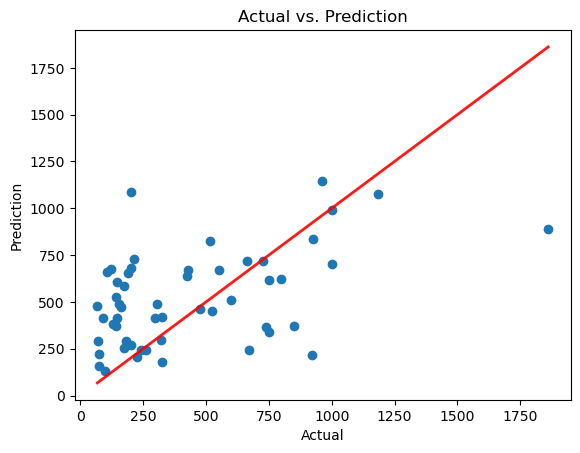

In [53]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lm)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

### Box-Cox Transformation

In [54]:
#Box-Cox Transformation
from scipy.stats import boxcox
box_results = boxcox(y_train, alpha = 0.05)

In [55]:
box_results

(array([ 8.68767642,  7.23164837, 10.57834815, 12.26939869, 10.83994871,
         6.62404411,  7.71258662,  8.68767642, 10.83994871,  8.96581785,
        11.22963399, 12.37152681,  9.42809521, 11.68471715, 11.22963399,
        10.2903865 , 11.07990572, 10.01452882,  6.24460125,  9.33424139,
        12.18523005,  8.49713804,  9.18694201,  9.85379764, 12.05455555,
         6.19217269,  8.29104472,  8.97678487,  9.12564319,  8.58783864,
        10.69755487, 12.26939869,  9.33424139, 13.38038527,  6.62404411,
        14.01171784, 10.66821468, 10.38965872, 11.15571849, 11.30175192,
         9.60648041,  7.84493411,  6.44250966,  7.42366699, 10.08065305,
         8.4167188 ,  7.92100039, 12.83795386,  5.73192967, 10.66821468,
         9.99213228, 11.57398419, 10.34045899, 10.91673547, 12.26939869,
         6.44250966, 11.44095555,  9.60648041, 13.35909851, 11.22963399,
         9.60648041, 13.4314587 ,  9.03092529,  9.7940383 , 10.92754387,
        10.79796189,  6.24460125, 10.44759156, 11.8

In [56]:
#log transformation
logy_train = np.log(y_train)
logy_train

98     5.703782
206    5.010635
54     6.514713
177    7.170120
27     6.620073
         ...   
183    4.828314
192    6.263398
256    5.991465
72     6.745236
263    6.606650
Name: Salary, Length: 210, dtype: float64

<Axes: xlabel='Salary', ylabel='Probability'>

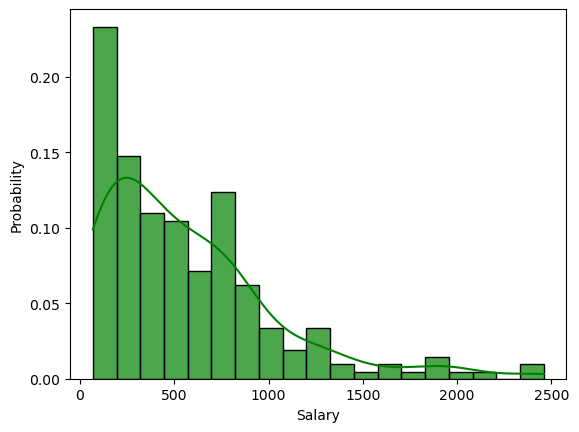

In [57]:
#Histogram of Salary
sns.histplot(y_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(y_train), max(y_train), 20))

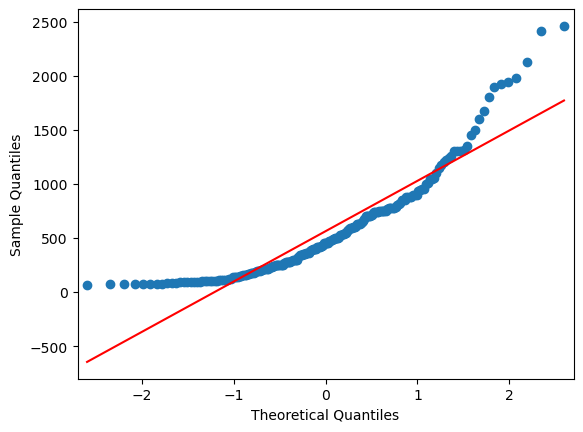

In [58]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(y_train, line = 's')
plt.show()

<Axes: xlabel='Salary', ylabel='Probability'>

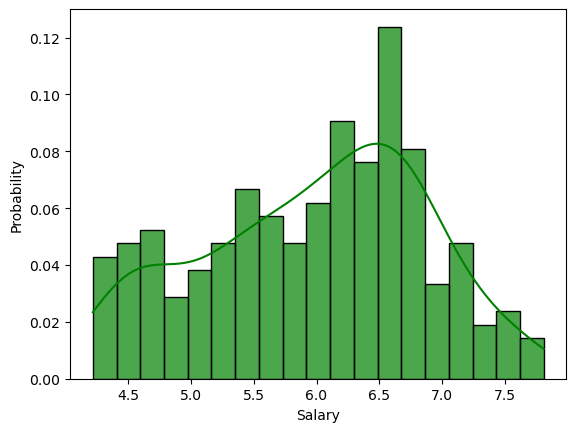

In [59]:
#Histogram of Log Salary
sns.histplot(logy_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(logy_train), max(logy_train), 20))

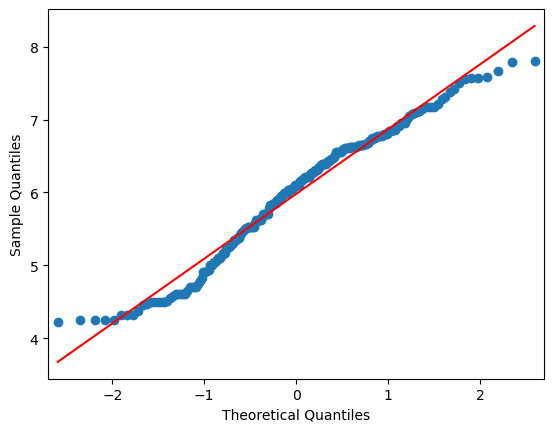

In [60]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

### Model 2: Linear Regression Using the Best Subset Selection

Algorithm:

1- Let M0 denote the null model , which contains no predictors. 

2- For k = 1, 2,...p:

(a) Fit all Cr(p, k) models that contain exactly k predictors.

(b) Pick the best among these models, and call it Mk.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp

   using cross-validated prediction error, AIC, BIC, or adjusted R-squared

In [61]:
X_train.head()

,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
98,1.0,415,115,27,97,71,68,3,711,184,45,156,119,99,274,2,7,1,1,1
206,1.0,407,93,8,47,30,30,2,969,230,14,121,69,68,172,317,25,1,1,1
54,1.0,403,101,12,45,53,39,12,5150,1429,166,747,666,526,316,6,5,0,0,0
177,1.0,441,118,28,84,86,68,8,2723,750,126,433,420,309,190,2,2,0,0,0
27,1.0,474,129,10,50,56,40,10,2331,604,61,246,327,166,732,83,13,1,1,1


In [62]:
#Define function to fit linear regression
def fit_lm(feature_set):
    reg_model = sm.OLS(logy_train, X_train[['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}

In [63]:
#Get All Combinations with 3 Variables
#Cr(19, 3)
import itertools
list(itertools.combinations(X_train.iloc[:, 1:].columns, 3))

[('AtBat', 'Hits', 'HmRun'),
 ('AtBat', 'Hits', 'Runs'),
 ('AtBat', 'Hits', 'RBI'),
 ('AtBat', 'Hits', 'Walks'),
 ('AtBat', 'Hits', 'Years'),
 ('AtBat', 'Hits', 'CAtBat'),
 ('AtBat', 'Hits', 'CHits'),
 ('AtBat', 'Hits', 'CHmRun'),
 ('AtBat', 'Hits', 'CRuns'),
 ('AtBat', 'Hits', 'CRBI'),
 ('AtBat', 'Hits', 'CWalks'),
 ('AtBat', 'Hits', 'PutOuts'),
 ('AtBat', 'Hits', 'Assists'),
 ('AtBat', 'Hits', 'Errors'),
 ('AtBat', 'Hits', 'League_N'),
 ('AtBat', 'Hits', 'Division_W'),
 ('AtBat', 'Hits', 'NewLeague_N'),
 ('AtBat', 'HmRun', 'Runs'),
 ('AtBat', 'HmRun', 'RBI'),
 ('AtBat', 'HmRun', 'Walks'),
 ('AtBat', 'HmRun', 'Years'),
 ('AtBat', 'HmRun', 'CAtBat'),
 ('AtBat', 'HmRun', 'CHits'),
 ('AtBat', 'HmRun', 'CHmRun'),
 ('AtBat', 'HmRun', 'CRuns'),
 ('AtBat', 'HmRun', 'CRBI'),
 ('AtBat', 'HmRun', 'CWalks'),
 ('AtBat', 'HmRun', 'PutOuts'),
 ('AtBat', 'HmRun', 'Assists'),
 ('AtBat', 'HmRun', 'Errors'),
 ('AtBat', 'HmRun', 'League_N'),
 ('AtBat', 'HmRun', 'Division_W'),
 ('AtBat', 'HmRun', 'NewLea

In [64]:
#Cr(19, 3)
len(list(itertools.combinations(X_train.iloc[:, 1:].columns, 3)))

969

In [65]:
def bestsubset_func(k):      
    res = []    
    #Looping over all possible combinations
    for features in itertools.combinations(X_train.iloc[:, 1:].columns, k):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
         #Note: numpy.argmax() returns indices of the maximum values along with the specified axis.
    
    #Return the best model
    return best_model

In [68]:
bestsubset_func(3)[0].model.exog_names

['const', 'Hits', 'CHits', 'Division_W']

In [70]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  1206.919275045395 seconds


In [71]:
models_bestsub

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534908,<statsmodels.regression.linear_model.Regressio...
5,0.54277,<statsmodels.regression.linear_model.Regressio...
6,0.547237,<statsmodels.regression.linear_model.Regressio...
7,0.551506,<statsmodels.regression.linear_model.Regressio...
8,0.557208,<statsmodels.regression.linear_model.Regressio...
9,0.56114,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [72]:
models_bestsub.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.67e-33
Time:                        18:25:53   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.000       4.299       4.926
Hits           0.0070      0.001      6.520      0.000       0.005       0.009
Years          0.0475      0.020      2.382      0.018       0.008       0.087
CRuns          0.0009      0.000      2.997      0.003       0.000       0.002
Division_W    -0.1846      0.085     -2.163      0.032      -0.353      -0.016
==============================================================================
Omnibus:                       14.703   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.045
Skew:                           0.259   Prob(JB):                     6.67e-08
Kurtosis:                       4.873   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
#Adj. RSquared
models_bestsub_adjrs = models_bestsub.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bestsub_adjrs

1     0.422670
2     0.508226
3     0.518598
4     0.525833
5     0.531564
6     0.533855
7     0.535964
8     0.539585
9     0.541391
10    0.541472
11    0.541688
12    0.540516
13    0.539044
14    0.537243
15    0.535404
16    0.533531
17    0.531110
18    0.528737
19    0.526265
dtype: float64

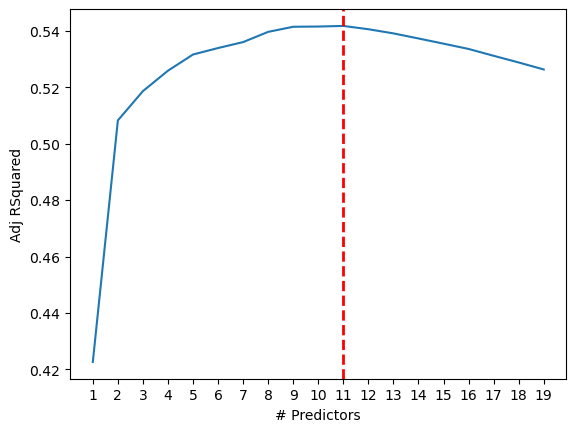

In [74]:
#Adj. RSquared Plot
plt.plot(models_bestsub_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bestsub_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

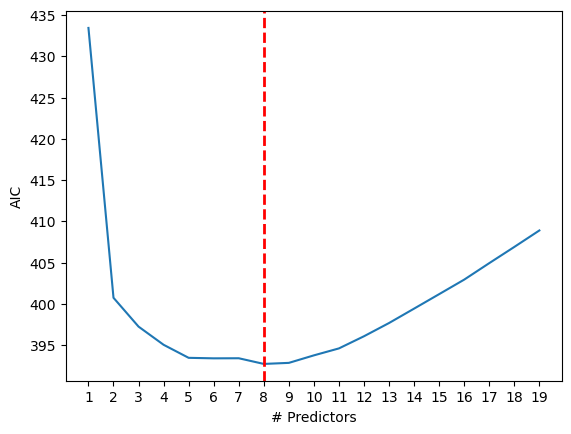

In [75]:
#AIC Plot
models_bestsub_aic = models_bestsub.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_bestsub_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bestsub_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

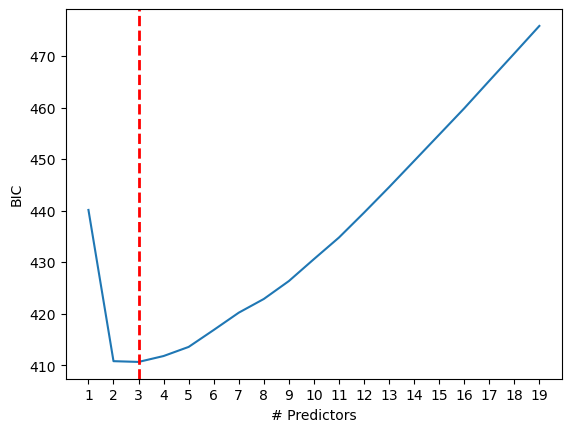

In [76]:
#BIC Plot
models_bestsub_bic = models_bestsub.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_bestsub_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bestsub_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [77]:
#Model with 11 Variables
models_bestsub.loc[11, 'model'].params

const         4.599892
AtBat        -0.002436
Hits          0.010633
HmRun         0.009030
Walks         0.008183
Years         0.057739
CRuns         0.001434
CWalks       -0.001006
PutOuts       0.000257
Assists       0.000365
League_N      0.125903
Division_W   -0.190390
dtype: float64

In [78]:
#Model with 11 Variables: Variable Names
models_bestsub.loc[11, 'model'].model.exog_names

['const',
 'AtBat',
 'Hits',
 'HmRun',
 'Walks',
 'Years',
 'CRuns',
 'CWalks',
 'PutOuts',
 'Assists',
 'League_N',
 'Division_W']

#### Model 2: Prediction on Test Dataset

In [79]:
X_test[models_bestsub.loc[11, 'model'].model.exog_names].head()

,const,AtBat,Hits,HmRun,Walks,Years,CRuns,CWalks,PutOuts,Assists,League_N,Division_W
295,1.0,19,4,1,1,1,2,1,692,70,1,1
132,1.0,278,70,7,18,18,935,643,0,0,0,1
137,1.0,343,103,6,40,15,581,325,211,56,0,0
268,1.0,549,149,7,42,1,73,42,255,450,1,1
239,1.0,309,72,0,26,5,41,26,117,269,1,0


In [80]:
pred_bestsub = models_bestsub.loc[11, 'model'].predict(X_test[models_bestsub.loc[11, 'model'].model.exog_names])
pred_bestsub.head()

295    4.811669
132    6.420305
137    6.687956
268    5.539181
239    5.400993
dtype: float64

In [81]:
pred_bestsub = np.exp(pred_bestsub)
pred_bestsub.head()

295    122.936656
132    614.190643
137    802.680216
268    254.469448
239    221.626363
dtype: float64

In [82]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [83]:
#Absolute error
abs_err_bestsub = abs(y_test - pred_bestsub)

In [86]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bestsub.mean(),
                                             'Median of AbsErrors' : abs_err_bestsub.median(),
                                             'SD of AbsErrors' :     abs_err_bestsub.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bestsub),
                                             'Min of AbsErrors':     abs_err_bestsub.min(),
                                             'Max of AbsErrors':     abs_err_bestsub.max()}, index = ['BestSubset']), 
                               ignore_index = False)

model_comp

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9584\456414161.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bestsub.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276


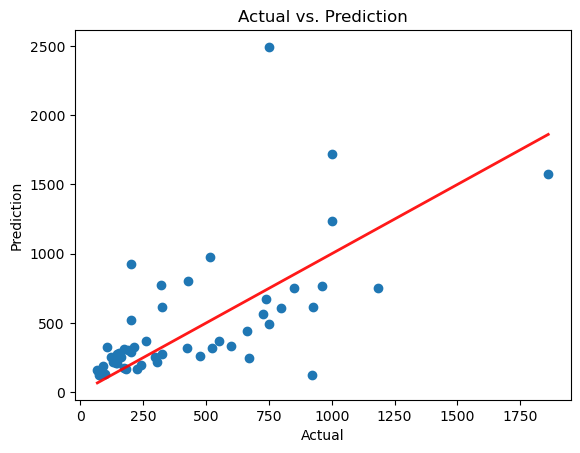

In [87]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_bestsub)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 3: Forward and Backward Stepwise Selection

Forward Stepwise Selection Algorithm:

1- Let M0 denote the null model , which contains no predictors. 

2- For k = 0, 2,...p - 1:

(a) Consider all C(p, k) models that augment the predictors in Mk 
       with one additional predictor.

(b) Pick the best among these models, and call it Mk+1.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R


In [88]:
def forward_func(features):
    res = []
    # Pull out features still needed to process
    remaining_features = [_ for _ in X_train.iloc[:, 1:].columns if _ not in features]
          
    for f in remaining_features:
        res.append(fit_lm(features + [f]))
   
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
    
    #Return the best model
    return best_model

In [89]:
#Forward Selection Implementation
import time #to measure the processing time
models_fw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = []
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_fw.loc[i] = forward_func(features)
    features = models_fw.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.41669130325317383 seconds


In [90]:
models_fw

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534138,<statsmodels.regression.linear_model.Regressio...
5,0.54277,<statsmodels.regression.linear_model.Regressio...
6,0.547122,<statsmodels.regression.linear_model.Regressio...
7,0.550685,<statsmodels.regression.linear_model.Regressio...
8,0.554685,<statsmodels.regression.linear_model.Regressio...
9,0.557618,<statsmodels.regression.linear_model.Regressio...
10,0.560101,<statsmodels.regression.linear_model.Regressio...


In [91]:
models_fw.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     58.76
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           5.53e-33
Time:                        18:27:59   Log-Likelihood:                -192.69
No. Observations:                 210   AIC:                             395.4
Df Residuals:                     205   BIC:                             412.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7982      0.126     37.978      0.000       4.549       5.047
CHits          0.0008   7.58e-05     10.560      0.000       0.001       0.001
Hits           0.0047      0.001      4.106      0.000       0.002       0.007
Division_W    -0.2006      0.085     -2.356      0.019      -0.368      -0.033
Walks          0.0047      0.002      1.949      0.053   -5.53e-05       0.009
==============================================================================
Omnibus:                       10.011   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               19.759
Skew:                           0.132   Prob(JB):                     5.12e-05
Kurtosis:                       4.479   Cond. No.                     2.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

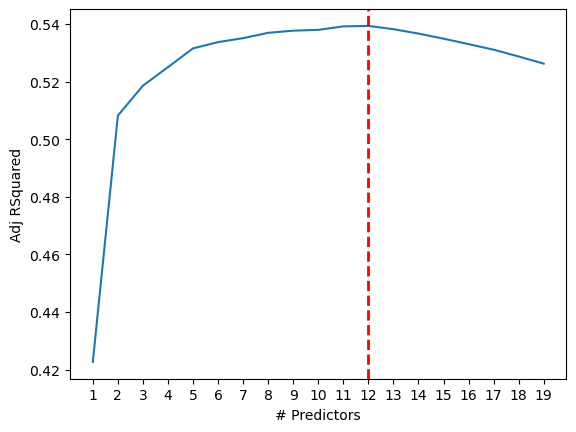

In [92]:
#Adj. RSquared
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs
#Adj. RSquared Plot
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_fw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

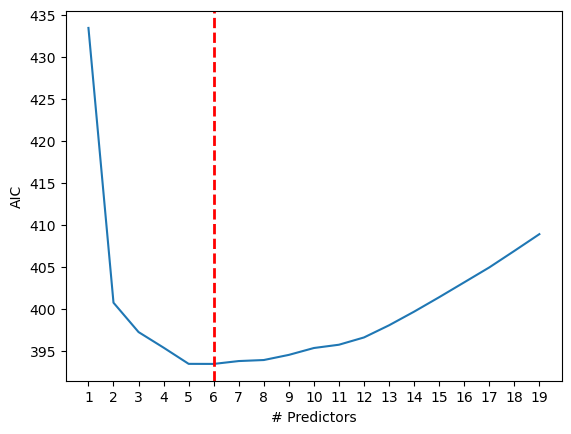

In [93]:
#AIC Plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

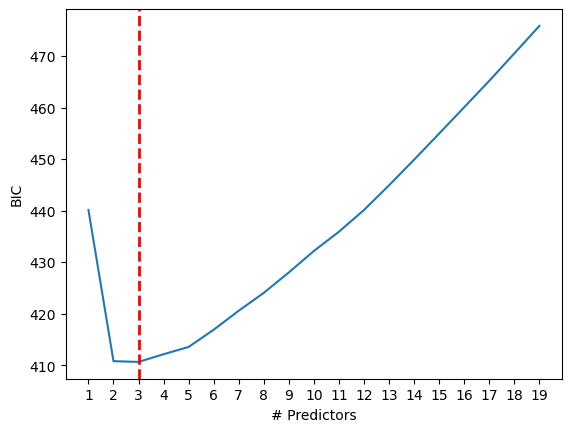

In [94]:
#BIC Plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [95]:
#Model with 12 Variables
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

Backward Selection Algorithm:

1- Let Mp denote the full model , which contains all predictors. 

2- For k = p, p - 1,..., 1:

(a) Consider all k models that contain all but one of the predictors
       in  Mk, for a total of k ??? 1 predictors.

(b) Pick the best among these models, and call it Mk-1.
       The best is defined as having the largest R-squared.

3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R

In [96]:
def backward_func(features):
    res = []
    for features in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
          
    #Return the best model
    return best_model

In [97]:
#Backward Selection Implementation
models_bw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):  
    models_bw.loc[len(features) - 1] = backward_func(features)
    features = models_bw.loc[len(features) - 1]["model"].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  0.43883848190307617 seconds


In [98]:
models_bw

,RSquared,model
19,0.569332,<statsmodels.regression.linear_model.Regressio...
18,0.569325,<statsmodels.regression.linear_model.Regressio...
17,0.569249,<statsmodels.regression.linear_model.Regressio...
16,0.569241,<statsmodels.regression.linear_model.Regressio...
15,0.568749,<statsmodels.regression.linear_model.Regressio...
14,0.568241,<statsmodels.regression.linear_model.Regressio...
13,0.567716,<statsmodels.regression.linear_model.Regressio...
12,0.566898,<statsmodels.regression.linear_model.Regressio...
11,0.56581,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [99]:
models_bw

,RSquared,model
19,0.569332,<statsmodels.regression.linear_model.Regressio...
18,0.569325,<statsmodels.regression.linear_model.Regressio...
17,0.569249,<statsmodels.regression.linear_model.Regressio...
16,0.569241,<statsmodels.regression.linear_model.Regressio...
15,0.568749,<statsmodels.regression.linear_model.Regressio...
14,0.568241,<statsmodels.regression.linear_model.Regressio...
13,0.567716,<statsmodels.regression.linear_model.Regressio...
12,0.566898,<statsmodels.regression.linear_model.Regressio...
11,0.56581,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [100]:
models_bw.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.67e-33
Time:                        18:28:49   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.000       4.299       4.926
Hits           0.0070      0.001      6.520      0.000       0.005       0.009
Years          0.0475      0.020      2.382      0.018       0.008       0.087
CRuns          0.0009      0.000      2.997      0.003       0.000       0.002
Division_W    -0.1846      0.085     -2.163      0.032      -0.353      -0.016
==============================================================================
Omnibus:                       14.703   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.045
Skew:                           0.259   Prob(JB):                     6.67e-08
Kurtosis:                       4.873   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

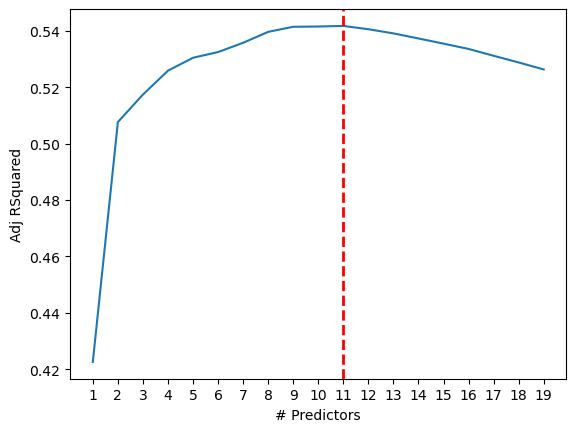

In [101]:
#Adj. RSquared
models_bw_adjrs = models_bw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bw_adjrs = models_bw_adjrs.sort_index()
#Adj. RSquared Plot
plt.plot(models_bw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

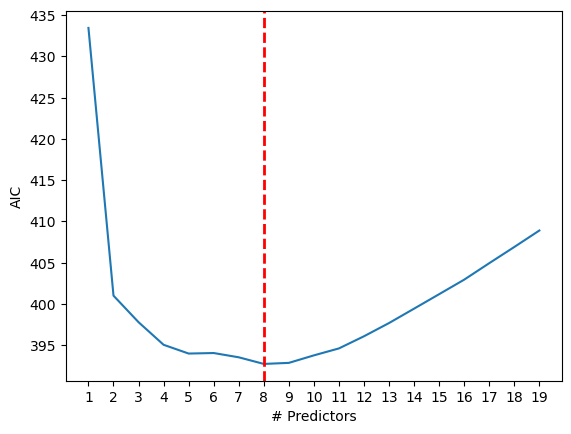

In [102]:
#AIC Plot
models_bw_aic = models_bw.apply(lambda row: row[1].aic, axis = 1)
models_bw_aic = models_bw_aic.sort_index()
plt.plot(models_bw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

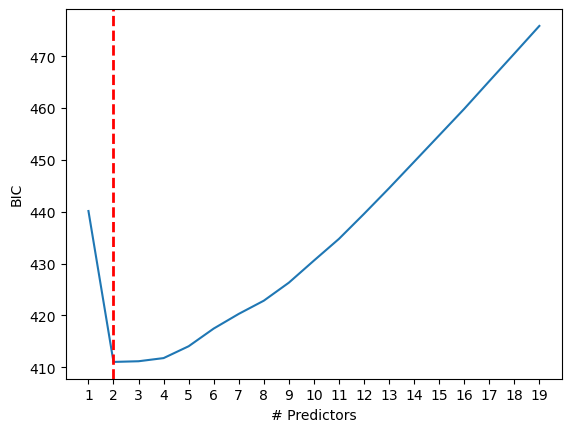

In [103]:
#BIC Plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic, axis = 1)
models_bw_bic = models_bw_bic.sort_index()
plt.plot(models_bw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 3: Prediction on Test Dataset

In [104]:
#Forward Selection Model with 12 Variables
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

In [105]:
pred_fw = models_fw.loc[12, 'model'].predict(X_test[models_fw.loc[12, 'model'].model.exog_names])
pred_fw = np.exp(pred_fw)
pred_fw.head()

295    122.907000
132    614.793307
137    802.378147
268    254.415807
239    221.544790
dtype: float64

In [116]:
#Absolute error
abs_err_fw = abs(y_test - pred_fw)

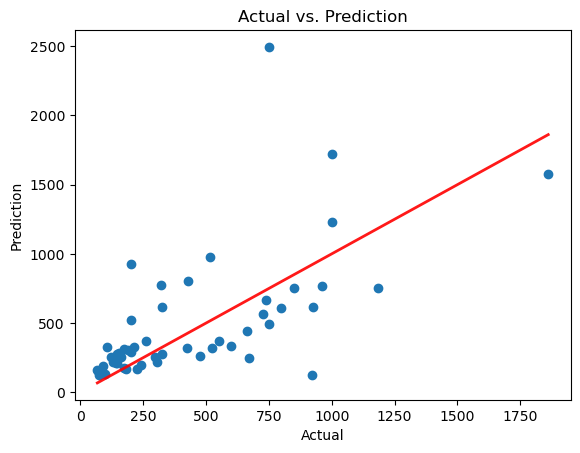

In [108]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

In [118]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw.mean(),
                                             'Median of AbsErrors' : abs_err_fw.median(),
                                             'SD of AbsErrors' :     abs_err_fw.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw),
                                             'Min of AbsErrors':     abs_err_fw.min(),
                                             'Max of AbsErrors':     abs_err_fw.max()}, index = ['Forward Stepwise']), 
                               ignore_index = False)

model_comp

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9584\455216166.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787


### Model 4: Using K-fold Cross-Validation Approach

In [113]:
k = 5
np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])

In [119]:
folds

array([3, 5, 3, 2, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2, 4, 5, 1, 1, 5, 2, 4,
       3, 5, 3, 5, 1, 1, 2, 4, 5, 5, 5, 2, 4, 3, 2, 5, 1, 4, 3, 1, 4, 3,
       3, 3, 3, 5, 4, 4, 5, 5, 4, 3, 1, 5, 4, 2, 4, 3, 2, 3, 5, 1, 2, 5,
       3, 2, 2, 4, 5, 2, 1, 1, 4, 2, 4, 4, 4, 2, 2, 3, 4, 4, 4, 4, 1, 2,
       4, 2, 5, 4, 2, 3, 4, 5, 4, 2, 1, 1, 4, 1, 2, 2, 1, 4, 2, 4, 5, 5,
       2, 5, 5, 4, 5, 4, 1, 5, 5, 5, 5, 1, 1, 2, 1, 1, 5, 3, 3, 1, 2, 1,
       3, 5, 5, 2, 3, 4, 2, 5, 4, 2, 2, 1, 2, 4, 2, 1, 2, 3, 3, 3, 2, 4,
       3, 4, 2, 2, 4, 4, 3, 5, 1, 4, 3, 4, 3, 3, 4, 2, 4, 2, 4, 4, 4, 4,
       1, 1, 5, 5, 1, 1, 5, 2, 3, 2, 5, 2, 4, 5, 3, 3, 5, 4, 1, 4, 4, 3,
       2, 2, 2, 3, 3, 3, 1, 1, 2, 4, 4, 4])

In [120]:
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 20))

In [121]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
#Forward Stepwise Regression Results
models_fw

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534138,<statsmodels.regression.linear_model.Regressio...
5,0.54277,<statsmodels.regression.linear_model.Regressio...
6,0.547122,<statsmodels.regression.linear_model.Regressio...
7,0.550685,<statsmodels.regression.linear_model.Regressio...
8,0.554685,<statsmodels.regression.linear_model.Regressio...
9,0.557618,<statsmodels.regression.linear_model.Regressio...
10,0.560101,<statsmodels.regression.linear_model.Regressio...


In [123]:
#Forward Stepwise Regression using K-fold Cross Validation
for i in range(1, models_fw.shape[0] + 1):
    for j in range(1, k + 1):
        reg_model = sm.OLS(logy_train[folds != j], X_train.loc[folds != j, models_fw.loc[i, 'model'].model.exog_names]).fit()
        pred = reg_model.predict(X_train.loc[folds == j, models_fw.loc[i, 'model'].model.exog_names])
        cv_errors.iloc[j - 1, i - 1] = ((logy_train[folds == j] - pred) ** 2).mean()

In [124]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.477069,0.374608,0.373031,0.408688,0.400012,0.393909,0.389225,0.382388,0.385926,0.385385,0.393025,0.397685,0.40048,0.404258,0.459198,0.462548,0.462557,0.463201,0.464154
2,0.413362,0.365228,0.352108,0.336338,0.329108,0.32223,0.319132,0.358139,0.386092,0.390405,0.387873,0.381728,0.381605,0.382956,0.387981,0.390367,0.404014,0.408642,0.413398
3,0.55082,0.450898,0.420034,0.413698,0.407515,0.441332,0.469542,0.469711,0.46432,0.459627,0.454081,0.452907,0.453371,0.456836,0.454371,0.486557,0.486129,0.494059,0.494108
4,0.515746,0.442436,0.446075,0.438682,0.423983,0.442168,0.435941,0.431067,0.427189,0.436557,0.434878,0.432092,0.435075,0.433337,0.441934,0.442486,0.441794,0.449281,0.4528
5,0.33433,0.297046,0.306527,0.305339,0.305757,0.299541,0.291894,0.282683,0.284287,0.28077,0.277756,0.28494,0.283284,0.289055,0.289068,0.287675,0.302909,0.306573,0.308875


In [125]:
mean_cv_erros = cv_errors.mean(axis = 0)
mean_cv_erros 

1     0.458265
2     0.386043
3     0.379555
4     0.380549
5     0.373275
6     0.379836
7     0.381147
8     0.384798
9     0.389563
10    0.390549
11    0.389523
12    0.389870
13    0.390763
14    0.393288
15    0.406510
16    0.413927
17    0.419480
18    0.424351
19    0.426667
dtype: float64

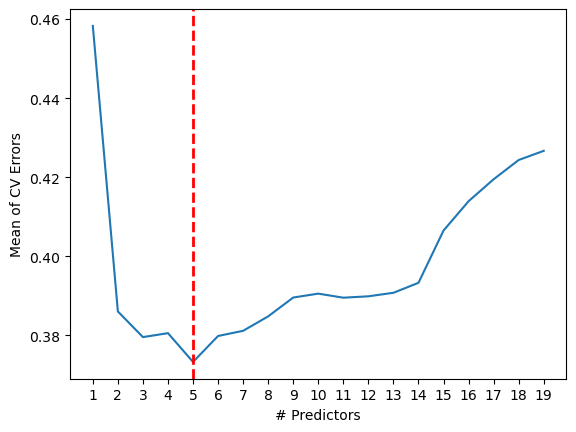

In [126]:
#Mean of CV Errors Plot
plt.plot(mean_cv_erros)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Mean of CV Errors')
plt.axvline(mean_cv_erros.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 4: Prediction on Test Dataset

In [127]:
#Forward Selection Model with 5 Variables
models_fw.loc[5, 'model'].params

const         4.575593
CHits         0.000466
Hits          0.005712
Division_W   -0.199733
Walks         0.005095
Years         0.044819
dtype: float64

In [128]:
pred_fw_cv = models_fw.loc[5, 'model'].predict(X_test[models_fw.loc[5, 'model'].model.exog_names])
pred_fw_cv = np.exp(pred_fw_cv)
pred_fw_cv.head()

295     85.668593
132    767.980860
137    732.069863
268    258.573612
239    217.376163
dtype: float64

In [129]:
#Absolute error
abs_err_fw_cv = abs(y_test - pred_fw_cv)

In [130]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw_cv.mean(),
                                             'Median of AbsErrors' : abs_err_fw_cv.median(),
                                             'SD of AbsErrors' :     abs_err_fw_cv.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw_cv),
                                             'Min of AbsErrors':     abs_err_fw_cv.min(),
                                             'Max of AbsErrors':     abs_err_fw_cv.max()}, index = ['Forward Stepwise CV']), 
                               ignore_index = False)

model_comp

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9584\3165189584.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw_cv.mean(),


,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170


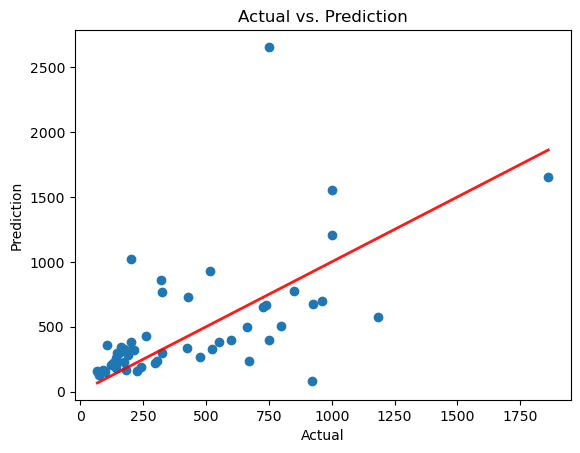

In [134]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_fw_cv)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

# End of the Code